In [ ]:
import pandas as pd
import numpy as np
import re

# Load datasets
disease_precaution_df = pd.read_csv('/content/drive/MyDrive/Disease precaution.csv')
disease_symptoms_df = pd.read_csv('/content/drive/MyDrive/DiseaseAndSymptoms.csv')

In [ ]:
# Preview the datasets
print(disease_precaution_df.head())
print(disease_symptoms_df.head())


          Disease                      Precaution_1  \
0   Drug Reaction                   stop irritation   
1         Malaria          Consult nearest hospital   
2         Allergy                    apply calamine   
3  Hypothyroidism                     reduce stress   
4       Psoriasis  wash hands with warm soapy water   

                   Precaution_2        Precaution_3  \
0      consult nearest hospital    stop taking drug   
1               avoid oily food  avoid non veg food   
2       cover area with bandage                 NaN   
3                      exercise         eat healthy   
4  stop bleeding using pressure      consult doctor   

                  Precaution_4  
0                    follow up  
1           keep mosquitos out  
2  use ice to compress itching  
3             get proper sleep  
4                   salt baths  
            Disease   Symptom_1              Symptom_2              Symptom_3  \
0  Fungal infection     itching              skin_rash   no

In [ ]:
# Combine symptoms into a single text string for each disease
disease_symptoms_df['Symptoms'] = disease_symptoms_df.iloc[:, 1:].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

In [ ]:
# Keep only the necessary columns
disease_symptoms_df = disease_symptoms_df[['Disease', 'Symptoms']]

In [ ]:
# Preprocess disease and symptoms data
disease_symptoms_df['Symptoms'] = disease_symptoms_df['Symptoms'].apply(lambda x: x.lower())
disease_symptoms_df['Symptoms'] = disease_symptoms_df['Symptoms'].apply(lambda x: re.sub(r'[^\w\s]', '', x))


In [ ]:
# Combine precautions with disease data
merged_df = pd.merge(disease_symptoms_df, disease_precaution_df, on='Disease', how='inner')
merged_df = merged_df[['Disease', 'Symptoms', 'Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]

In [ ]:
# Tokenization and vectorization
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Shuffle the dataset
merged_df = merged_df.sample(frac=1, random_state=42).reset_index(drop=True)

X = merged_df['Symptoms']
y = merged_df['Disease']

X_vec = vectorizer.fit_transform(X)

# Split data into training, validation, and test sets
# Different data split
X_train, X_temp, y_train, y_temp = train_test_split(X_vec, y, test_size=0.3, random_state=123)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=123)



In [ ]:
print(f'Original dataset size: {merged_df.shape}')
merged_df = merged_df.drop_duplicates()
print(f'Dataset size after removing duplicates: {merged_df.shape}')


Original dataset size: (4920, 6)
Dataset size after removing duplicates: (304, 6)


In [ ]:
# Remove duplicates
merged_df = merged_df.drop_duplicates()

# Shuffle the dataset
merged_df = merged_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
# Tokenization and vectorization
from sklearn.feature_extraction.text import CountVectorizer

X = merged_df['Symptoms']
y = merged_df['Disease']

vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X)

# Split data into training, validation, and test sets
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X_vec, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Train a Logistic Regression model with L2 regularization
model = LogisticRegression(max_iter=1000, penalty='l2', C=0.1)  # C is the inverse of regularization strength
model.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000)

In [ ]:
# Evaluate the model on validation set
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.2f}')

# Evaluate the model on test set
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy:.2f}')

# Classification report
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Validation Accuracy: 0.89
Test Accuracy: 0.85
Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      0.50      0.67         2
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      0.50      0.67         2
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         2
                            Common Col

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

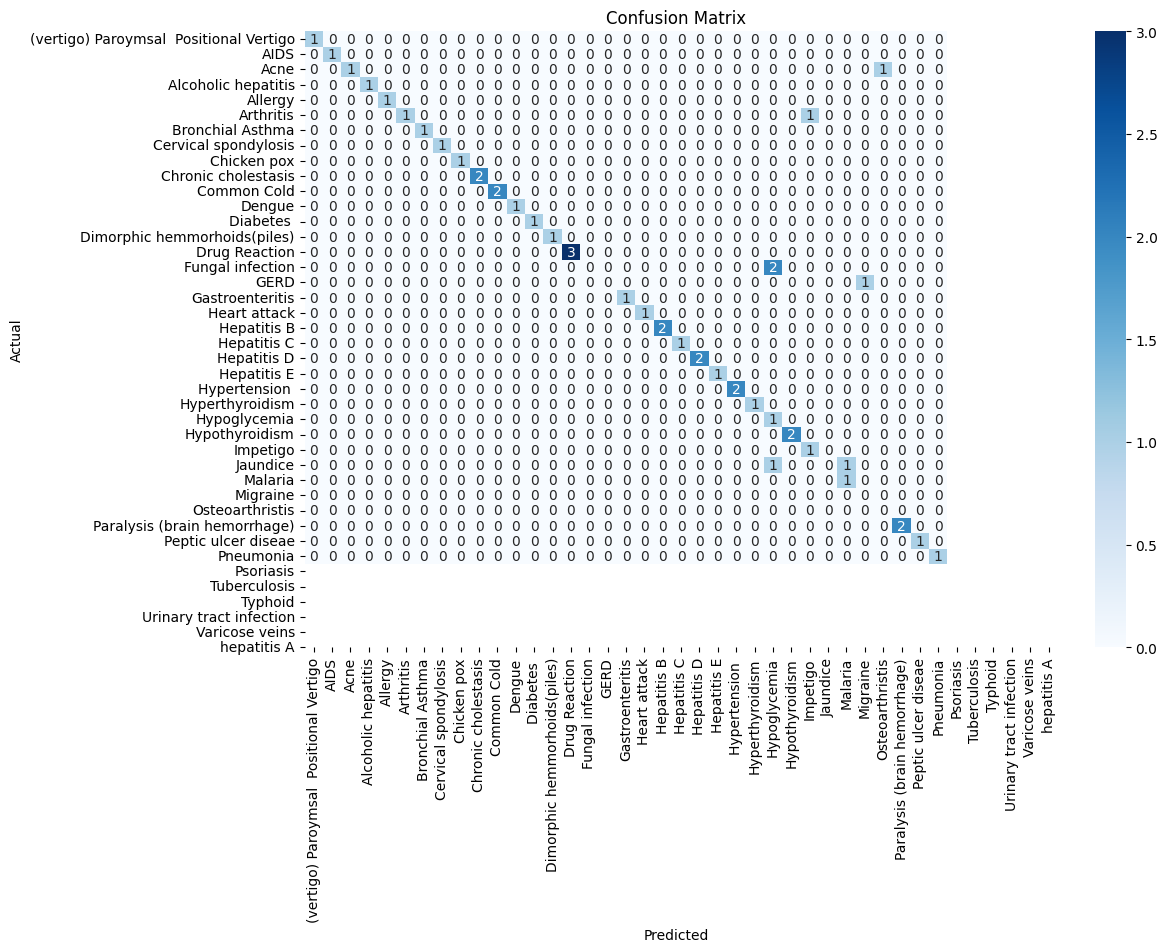

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
import joblib
# Save the model
model_path = '/content/drive/My Drive/disease_model.pkl'
joblib.dump(model, model_path) # Use 'model' instead of 'rf_model'
print(f'Model saved to {model_path}')


Model saved to /content/drive/My Drive/disease_model.pkl
